In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

import scipy
from sklearn.cluster import KMeans


from numpy.random import RandomState

rs = RandomState(12345)

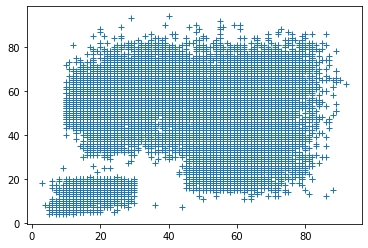

In [2]:
# import data
raw_df = pd.read_csv('./fifa_20.csv')
raw_df = raw_df[['mentality_interceptions','power_long_shots']]
plt.plot(raw_df['mentality_interceptions'], raw_df['power_long_shots'], '+')
plt.show()

# test_df = raw_df.copy()

# split_ratio = 0.7

# # create split for training and testing
# [training_data, test_data] = sklearn.model_selection.train_test_split(raw_df
#                                                                     , test_size= 1 - split_ratio
#                                                                     , train_size=split_ratio
#                                                                     , random_state=rs
#                                                                     , shuffle=True
#                                                                     , stratify=None)

# display(training_data)


## 1 Density-based clustering: DBSCAN

In the last exercise we learned about the centroid-based clustering algorithm K-Means. In this exercise we will compare it with the density-based clustering algorithm DBSCAN, the agglomerative hierarchical clustering and the hierarchical density-based clustering algorithm OPTICS. We use the features ``mentality_interceptions`` and ``power_long_shots``.

For now we will have a look at DBSCAN.  
To do so, estimate a suitable value for $\epsilon$.
Set *MinPts=30* (necessary because the data is relativaly dense and low dimensional) and use a k-distance plot for estimating a proper range for $\epsilon$. For creating this plot, we propose the following steps:
- use the *kneighbors_graph()* function of sklearn for getting the distance of each point to its $k$ (*MinPts*) neighbors <br>
(http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.kneighbors_graph.html)
- convert the result to a 2d array
- get the maximum of each row
- sort these values and create the plot

In [3]:
# Follow the suggested steps to plot a k-distance plot. 


from sklearn.neighbors import kneighbors_graph
input_array = raw_df.copy().values

# number of neighbors of each point
MinPts = 30
A = kneighbors_graph(input_array, MinPts, mode='distance', include_self=True)
# A has size n_sample x n_samples, sorted in ascending order of distance
print(A.shape)

(18278, 18278)


In [4]:
# convert the result to 2d array 
# dimension one: 'mentality_interceptions'
# dimension two: 'power_long_shots'
A_array = A.toarray()
print(A_array.shape)
# maximum in each row
row_max = np.amax(A_array, axis = 0)

(18278, 18278)


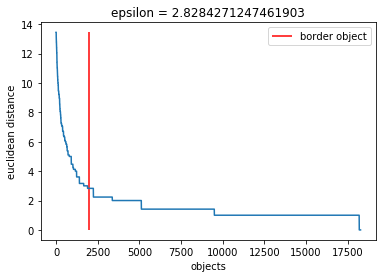

In [17]:
# sort in descending order and plot
row_max = np.sort(row_max)[::-1]
plt.plot(row_max)
plt.ylabel('euclidean distance')
plt.xlabel('objects')
border_x = 2000
plt.vlines(x = border_x, ymin=0, ymax=row_max.max(), colors = 'r', label = 'border object')
plt.legend()
epsilon = row_max[border_x]
plt.title('epsilon = ' + str(epsilon))
plt.show()


Use the estimated parameter range for DBSCAN (http://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html). Visualize the result. 



Adjust the parameters to get better results and create one plot with and one without the detected noise (it has cluster label < 0).


,mentality_interceptions,power_long_shots,cluster
count,18278.000000,18278.000000,18278.000000
mean,46.380239,46.812945,0.112868
std,20.775812,19.322343,0.332296
min,3.000000,4.000000,-1.000000
25%,25.000000,32.000000,0.000000
50%,52.000000,51.000000,0.000000
75%,64.000000,62.000000,0.000000
max,92.000000,94.000000,6.000000


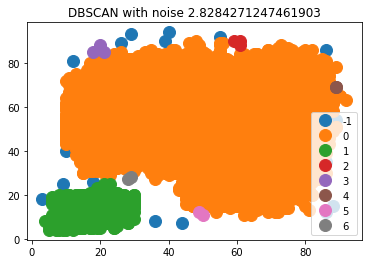

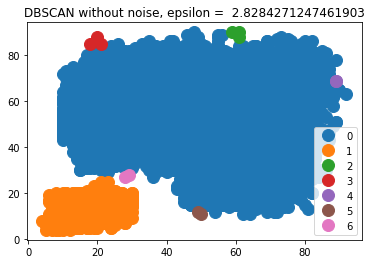

In [18]:
# Run DBSCAN

from sklearn.cluster import DBSCAN

def cluster_plot(df, title_str):
    '''df has an additional column 'cluster' with cluster labels'''
    groups = df.groupby('cluster')
    plt.figure()
    # plot all different clusters
    for name, group in groups:       
        plt.plot( group.iloc[:,0]
                , group.iloc[:,1]
                , marker='o'
                , linestyle=''
                , markersize=12
                , label=name)
        plt.legend()
        plt.title(title_str)
        plt.xlabel('')
        plt.ylabel('')
    plt.show()

def cluster_DBSCAN(input_array, epsilon):
    clustering = DBSCAN(eps=epsilon, min_samples=2).fit(input_array)
    output_df = raw_df.copy()
    output_df['cluster'] = clustering.labels_
    display(output_df.describe())

    # clustering result plot with noise
    df = output_df
    title_str = 'DBSCAN with noise ' + str(epsilon)
    cluster_plot(df, title_str)

    # clustering result plot without noise
    df = output_df[output_df['cluster']>= 0]
    title_str = 'DBSCAN without noise, epsilon =  ' + str(epsilon)
    cluster_plot(df, title_str)


cluster_DBSCAN(input_array, epsilon)

### Manual tweeking of parameter epsilon
from lost week we know, that for clusters optimize the silhuette coefficient for k-means. So lets see how DBSCAN looks with four clusters.

,mentality_interceptions,power_long_shots,cluster
count,18278.000000,18278.000000,18278.000000
mean,46.380239,46.812945,0.111445
std,20.775812,19.322343,0.319523
min,3.000000,4.000000,-1.000000
25%,25.000000,32.000000,0.000000
50%,52.000000,51.000000,0.000000
75%,64.000000,62.000000,0.000000
max,92.000000,94.000000,3.000000


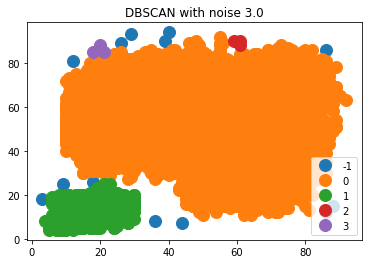

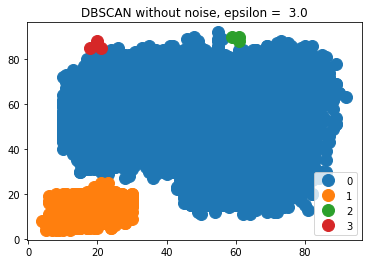

In [19]:
# The maximum distance between two samples for one to be considered as in the neighborhood of the other. This is not a maximum bound on the distances of points within a cluster. This is the most important DBSCAN parameter to choose appropriately for your data set and distance function.
# AS DETERMINED ABOVE
epsilon = 3.0
cluster_DBSCAN(input_array, epsilon)

# 2 Agglomerative Hierarchical Clustering

Secondly we will look at agglomerative hierarchical clustering.  
Use the sklearn implementation of agglomerative clustering (https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html) to cluster the same data as before. Try different numbers of clusters (the parameter n_clusters) and see which work well.  
Visualize the resulting clusters with a scatterplot.


In [31]:
# Run Agglomerative Hierarchical Clustering

from sklearn.cluster import AgglomerativeClustering
clustering = AgglomerativeClustering(n_clusters=3
                                   , affinity='euclidean'
                                   , memory=None
                                   , connectivity=None
                                   , compute_full_tree='auto'
                                   , linkage='ward'
                                   , distance_threshold=None).fit(input_array)
output_df = raw_df.copy()
output_df['cluster'] = clustering.labels_
display(output_df.describe())

,mentality_interceptions,power_long_shots,cluster
count,18278.000000,18278.000000,18278.000000
mean,46.380239,46.812945,0.501477
std,20.775812,19.322343,0.687529
min,3.000000,4.000000,0.000000
25%,25.000000,32.000000,0.000000
50%,52.000000,51.000000,0.000000
75%,64.000000,62.000000,1.000000
max,92.000000,94.000000,2.000000


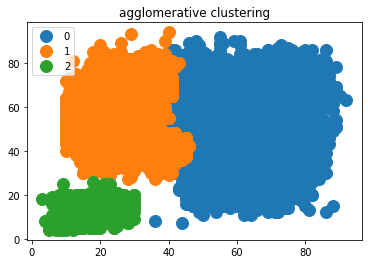

In [32]:
# Visualization
cluster_plot(output_df, title_str='agglomerative clustering')

# n_clusters = 3 seems to produce the most intuitive results

# 3 Hierarchical Density-based Clustering: OPTICS

The last clustering algorithm we will look at is OPTICS.  
Use the sklearn implementation of OPTICS (https://scikit-learn.org/stable/modules/generated/sklearn.cluster.OPTICS.html) to cluster the same data as before. Set the min_samples to 30 and use a min_cluster_size of 0.05.  
Plot the resulting clusters with and without noise. Noise can be identified the same as in DBSCAN (label of the cluster is < 0). 

**NOTE:** OPTICS may take some time to process. Don't be alarmed if your code takes a minute or two to calculate the clusters.

In [35]:
# Run Optics
from sklearn.cluster import OPTICS
clustering = OPTICS(min_samples=30, min_cluster_size = 0.05).fit(input_array)
output_df = raw_df.copy()
output_df['cluster'] = clustering.labels_
display(output_df.describe())

,mentality_interceptions,power_long_shots,cluster
count,18278.000000,18278.000000,18278.000000
mean,46.380239,46.812945,0.107178
std,20.775812,19.322343,1.073922
min,3.000000,4.000000,-1.000000
25%,25.000000,32.000000,-1.000000
50%,52.000000,51.000000,0.000000
75%,64.000000,62.000000,1.000000
max,92.000000,94.000000,2.000000


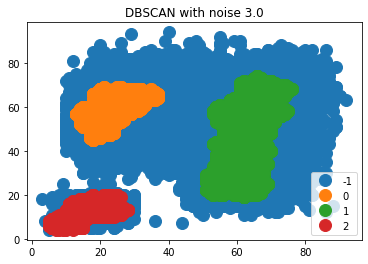

In [36]:
# Visualization with noise
df = output_df
title_str = 'DBSCAN with noise ' + str(epsilon)
cluster_plot(df, title_str)

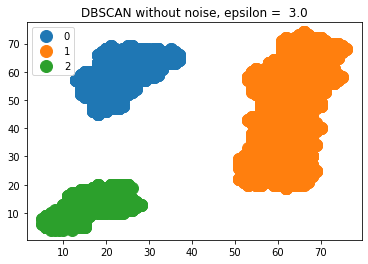

In [37]:
# Visualization without noise
df = output_df[output_df['cluster']>= 0]
title_str = 'DBSCAN without noise, epsilon =  ' + str(epsilon)
cluster_plot(df, title_str)

## The result optained by OPTICS looks somewhat different from the other algorithms and seems not to produce usefuil results...